In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 60s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

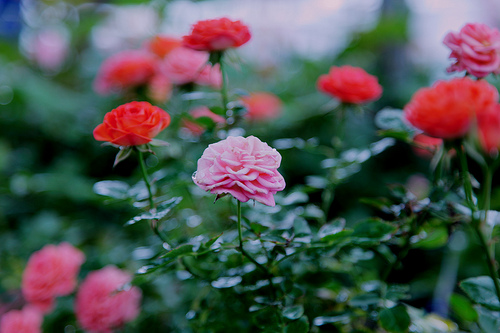

In [8]:
PIL.Image.open(str(roses[1]))

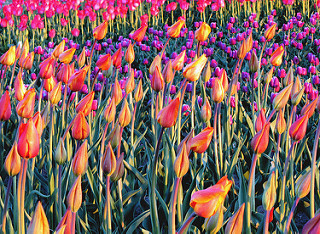

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(243, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train[0].shape

(180, 180, 3)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Preprocessing: scale images

In [23]:
X_train_scaled[0].shape

(180, 180, 3)

## Build convolutional neural network and train it

In [24]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.3249 - loss: 1.6743
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.6006 - loss: 1.0180
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.7031 - loss: 0.8105
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.7746 - loss: 0.6275
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.8429 - loss: 0.4407
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.9205 - loss: 0.2298
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.9397 - loss: 0.1922
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.9667 - loss: 0.1040
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.9810 - loss: 0.0687
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.9852 - loss: 0.0452
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9879 - loss: 0.0426
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16

In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6227 - loss: 3.5842


[3.580298900604248, 0.6296296119689941]

### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [26]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


array([[ -2.0203564 ,  17.189318  ,   7.9969773 , -11.541858  ,
         -5.1427193 ],
       [ 15.274536  ,  -0.70449334,  -8.044952  ,  -2.8170788 ,
          1.7136567 ],
       [  1.566839  , -17.844635  ,  16.708862  ,   3.1193223 ,
         -8.691194  ],
       ...,
       [ -9.441353  ,  -1.2183219 ,  -1.4152287 ,  10.955401  ,
         -7.309689  ],
       [  9.037143  ,  -3.1918726 ,  -4.114793  ,  -9.095317  ,
          9.088368  ],
       [ -3.5158606 , -33.370735  ,   2.8840067 ,  35.56213   ,
          3.1041982 ]], dtype=float32)

In [27]:
score = tf.nn.softmax(predictions[0])

In [28]:
np.argmax(score)

1

In [29]:
y_test[0]

1

## Improve Test Accuracy Using Data Augmentation

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


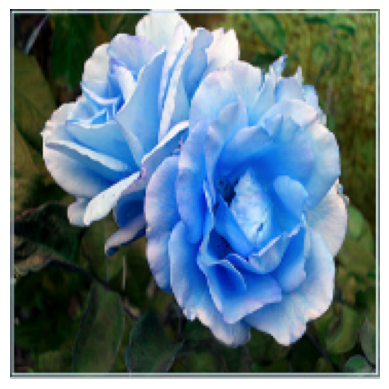

In [35]:
plt.axis('off')
plt.imshow(X[2])

##  Newly generated training sample using data augmentation

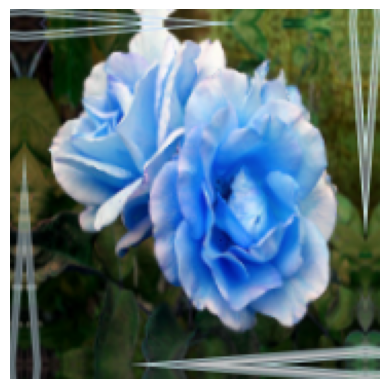

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [37]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.3517 - loss: 1.5535
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.5811 - loss: 1.0692
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - accuracy: 0.6461 - loss: 0.9372
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.6469 - loss: 0.9248
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.6448 - loss: 0.8914
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 203ms/step - accuracy: 0.6908 - loss: 0.7939
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.6987 - loss: 0.7931
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.7102 - loss: 0.7589
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.7442 - loss: 0.6756
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.7433 - loss: 0.6976
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.7427 - loss: 0.6740
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17

In [38]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7579 - loss: 0.7618


[0.7812287211418152, 0.757080614566803]

### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%